# Proyecto 2 Deep Learning
## María Fernanda García Villavicencio 

**Base de datos:** Rock, Paper, Scissors(https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors?select=scissors). 

El siguiente proyecto hace una clasificación de imágenes Rock, Paper y Scissors a partir de la aplicación de filtros visuales, es importante mencionar que la extracción de los datos es a partir de carpetas y del enlace directo del sitio. 

A partir de los filtros aplicados se construirá un modelo de red neuronal convolucional (CNN)

In [17]:
!pip install kagglehub

In [113]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
    --------------------------------------- 0.8/39.5 MB 8.5 MB/s eta 0:00:05
   ---- ----------------------------------- 4.5/39.5 MB 17.9 MB/s eta 0:00:02
   --------- ------------------------------ 8.9/39.5 MB 18.4 MB/s eta 0:00:02
   ------------- -------------------------- 13.6/39.5 MB 19.9 MB/s eta 0:00:02
   ------------------ --------------------- 18.6/39.5 MB 20.6 MB/s eta 0:00:02
   --------------------- ------------------ 21.5/39.5 MB 19.4 MB/s eta 0:00:01
   -------------------------- ------------- 26.2/39.5 MB 19.8 MB/s eta 0:00:01
   ------------------------------- -------- 30.9/39.5 MB 20.2 MB/s eta 0:00:01
   ----------------------------------- ---- 34.6/39.5 MB 20.4 MB/s eta 0:00:01
   ---------------------------------------  38.8/39.5 MB 20.0 MB/s eta 0:00:01
   ---------------------------------------- 39.5/39.5 MB 18.6 MB/s eta 0:00:00


In [82]:
# Librerías a utilizar 
import numpy as np 
import pandas as pd
import random
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import shutil
import os
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)



In [19]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("drgfreeman/rockpaperscissors")

print("Path to dataset files:", path)

100%|███████████████████████████████████████████████████████████████████████████████| 306M/306M [00:10<00:00, 30.8MB/s]

Extracting files...


Path to dataset files: C:\Users\Fer16\.cache\kagglehub\datasets\drgfreeman\rockpaperscissors\versions\2


In [62]:
image_dir = 'C:\\Users\\Fer16\\.cache\\kagglehub\\datasets\\drgfreeman\\rockpaperscissors\\versions\\2'
#Cleaning
unwanted = os.path.join(image_dir, 'rps-cv-images')
if os.path.exists(unwanted):
    shutil.rmtree(unwanted)

Found 2188 images belonging to 3 classes.
Clases encontradas: {'paper': 0, 'rock': 1, 'scissors': 2}


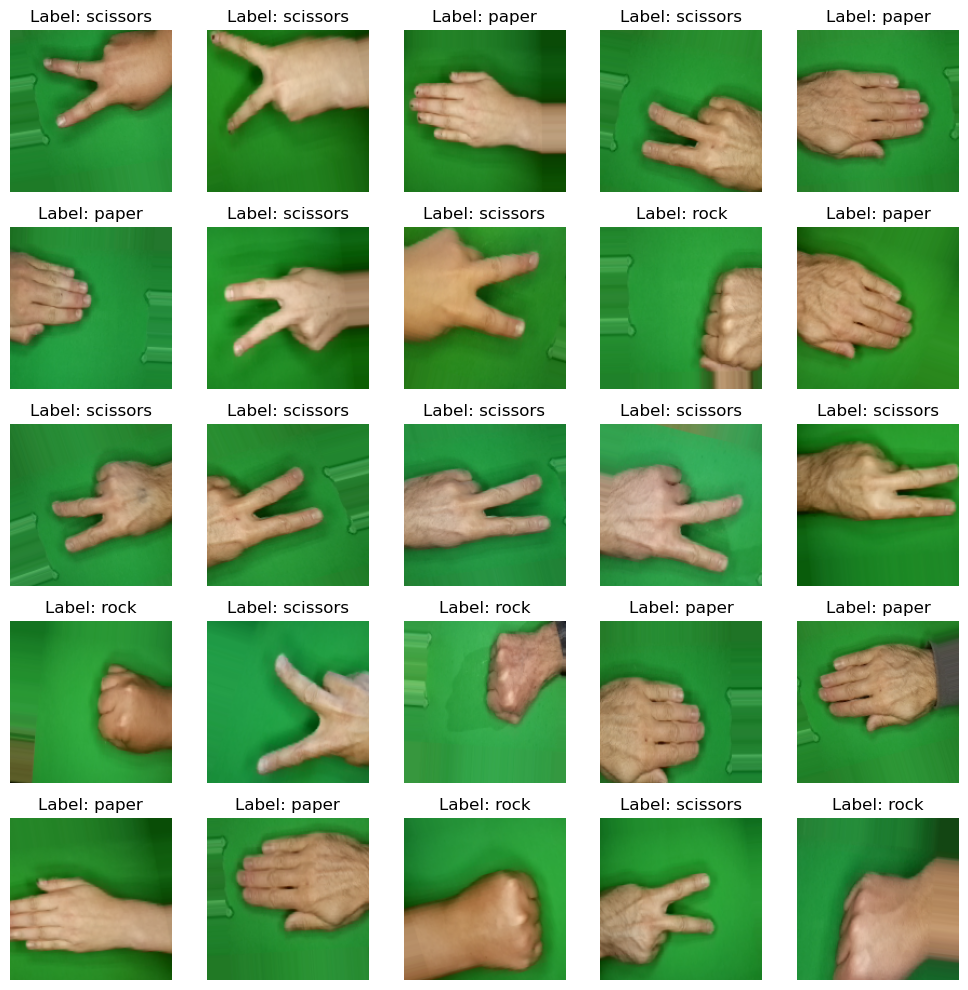

In [66]:

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

image_generator = datagen.flow_from_directory(
    image_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Para 3 o más clases
)

print("Clases encontradas:", image_generator.class_indices)

# Función para visualizar imágenes con sus etiquetas
def plot_images(images, titles):
    plt.figure(figsize=(10, 10))
    for i in range(min(25, len(images))):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

images, labels = next(image_generator)

class_names = list(image_generator.class_indices.keys())
label_indices = labels.argmax(axis=1)  
label_names = [class_names[i] for i in label_indices]

# Mostrar imágenes con sus etiquetas
plot_images(images, [f'Label: {name}' for name in label_names])

In [72]:
import os
import shutil
import random

# Ruta original
original_dataset = 'C:\\Users\\Fer16\\.cache\\kagglehub\\datasets\\drgfreeman\\rockpaperscissors\\versions\\2'
clean_dataset = os.path.join(original_dataset)  

# Nuevas carpetas
base_output = 'C:\\Users\\Fer16\\rockpaperscissors_split'
train_dir = os.path.join(base_output, 'train')
test_dir = os.path.join(base_output, 'test')

# Crear las carpetas si no existen
for label in ['rock', 'paper', 'scissors']:
    os.makedirs(os.path.join(train_dir, label), exist_ok=True)
    os.makedirs(os.path.join(test_dir, label), exist_ok=True)

# Porcentaje para test
test_split = 0.2

# Mover imágenes por clase
for label in ['rock', 'paper', 'scissors']:
    src_dir = os.path.join(clean_dataset, label)
    images = os.listdir(src_dir)
    random.shuffle(images)

    test_count = int(len(images) * test_split)
    test_images = images[:test_count]
    train_images = images[test_count:]

    # Copiar imágenes a sus nuevas ubicaciones
    for img in train_images:
        shutil.copy(os.path.join(src_dir, img), os.path.join(train_dir, label, img))
    for img in test_images:
        shutil.copy(os.path.join(src_dir, img), os.path.join(test_dir, label, img))

print("División completada.")

División completada.


In [94]:

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [96]:
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(3, activation='softmax')  
])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,636,739 (40.58 MB)

 Trainable params: 10,636,739 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

In [98]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [100]:
# Entrenar el modelo
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 814ms/step - accuracy: 0.5061 - loss: 1.4984 - val_accuracy: 0.8534 - val_loss: 0.4616
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8438 - loss: 0.4111 - val_accuracy: 0.8582 - val_loss: 0.4630
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 392ms/step - accuracy: 0.8776 - loss: 0.3811 - val_accuracy: 0.8966 - val_loss: 0.3363
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9375 - loss: 0.2243 - val_accuracy: 0.8990 - val_loss: 0.2966
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 359ms/step - accuracy: 0.9454 - loss: 0.1842 - val_accuracy: 0.9519 - val_loss: 0.1650
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9688 - loss: 0.1537 - val_accuracy: 0.9447 - val_loss: 0.1786
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 385ms/step - accuracy: 0.9557 - loss: 0.1125 - val_accuracy: 0.9327 - val_loss: 0.1848
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 1.0000 - loss: 0.0328 - val_accuracy: 0.

In [102]:
test_loss, test_acc = model.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size,
    verbose=1
)

print(f"\nPrecisión en el conjunto de prueba: {test_acc:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - accuracy: 0.9572 - loss: 0.1374

Precisión en el conjunto de prueba: 0.9591


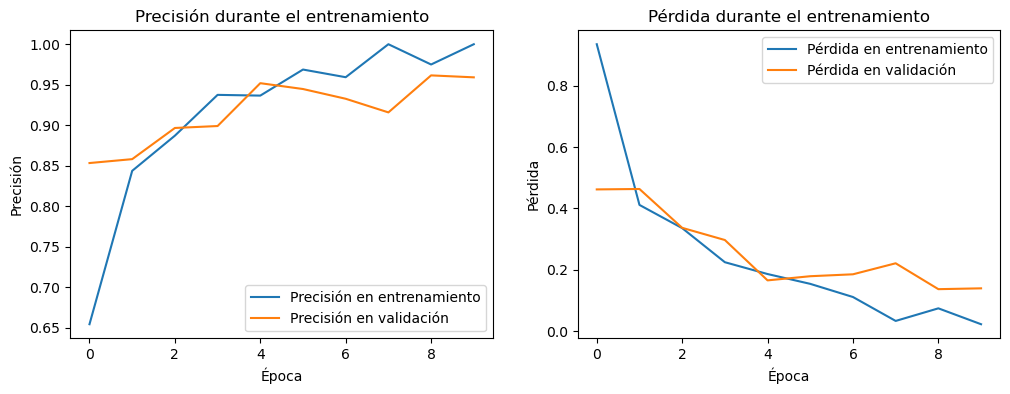

In [104]:
plt.figure(figsize=(12, 4)) 
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


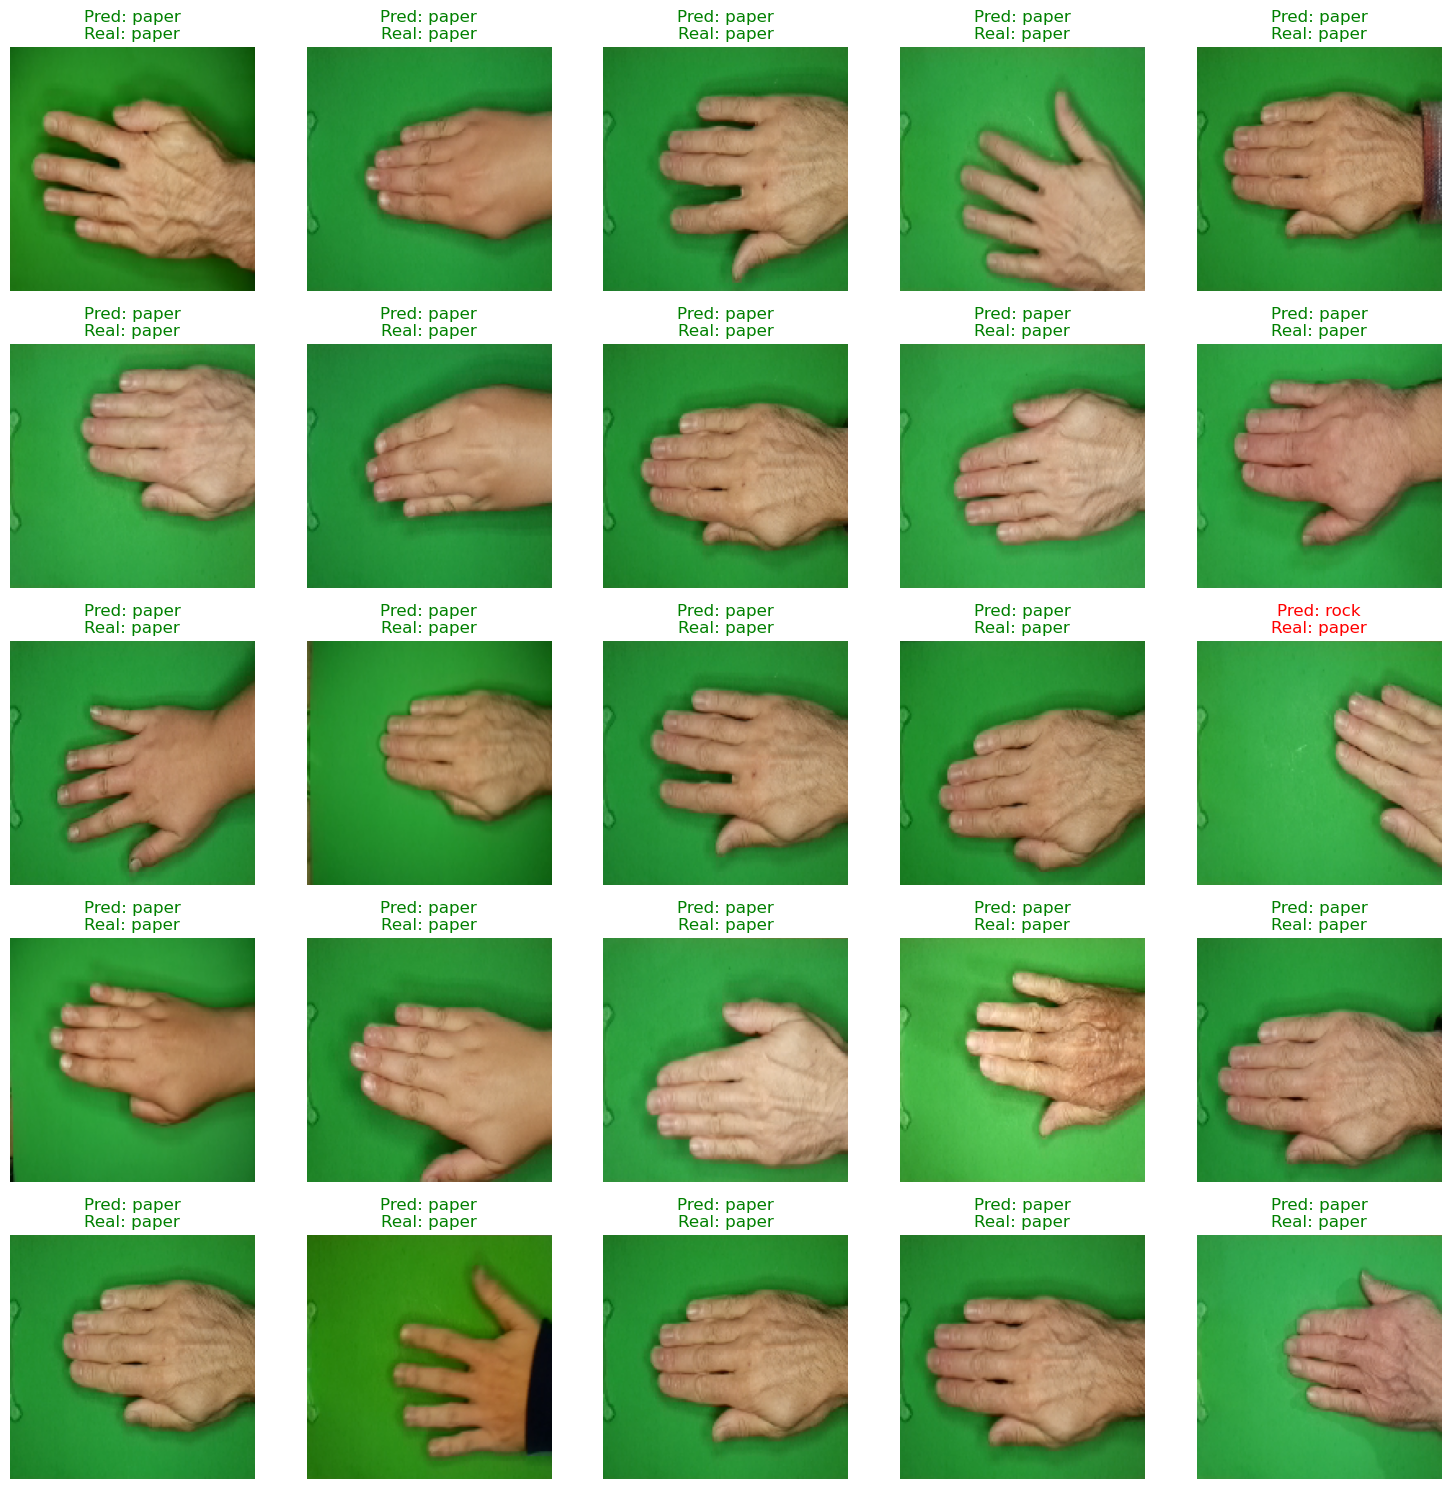

In [106]:

# Obtener imágenes y etiquetas reales desde el generador
test_images, test_labels = next(test_generator)  

# Hacer predicciones
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

class_names = list(test_generator.class_indices.keys())
plt.figure(figsize=(15, 15))
for i in range(min(25, len(test_images))):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i])
    color = 'green' if predicted_labels[i] == true_labels[i] else 'red'
    plt.title(f"Pred: {class_names[predicted_labels[i]]}\nReal: {class_names[true_labels[i]]}",
              color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()

### Justificación de los filtros
Basado en el archivo visto durante el diplomado "left look" se aplicaron filtros geométricos los cuales aplicaron transformaciones aleatorias en el ángulo posición- La elección de estos filtros simulan variaciones reales en la captura de imágenes, lo cual enriquece al conjunto de entrenamiento y evita el sobreajuste además mejora la capacidad del modelo para generalizar en nuevos ejemplos. De ahí se utilizó un modelo de red neuronal convolucional CNN, basado en el archivo MNIST, clasificando así las imagenes en tres clases: piedra, papel o tijeras alcanzando buenos niveles de precisión.

## Aplicando otro filtro

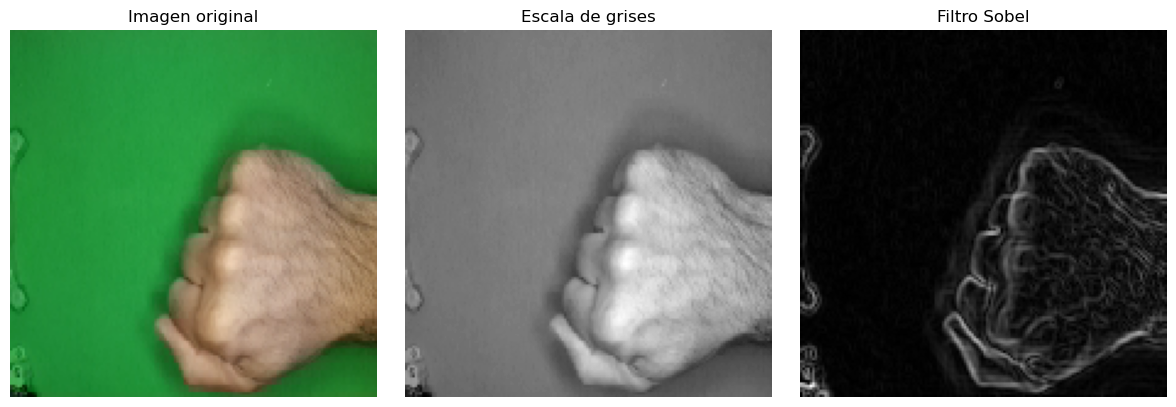

In [115]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

sample_path = os.path.join(
    'C:/Users/Fer16/rockpaperscissors_split/test/rock',
    os.listdir('C:/Users/Fer16/rockpaperscissors_split/test/rock')[0]
)

# Cargar imagen (150x150 RGB)
img = load_img(sample_path, target_size=(150, 150))
img_array = img_to_array(img).astype('uint8')

# Convertir a escala de grises
gray = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)

# Aplicar filtro Sobel 
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobelx, sobely)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_array.astype('uint8'))
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title('Escala de grises')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Filtro Sobel')
plt.axis('off')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step


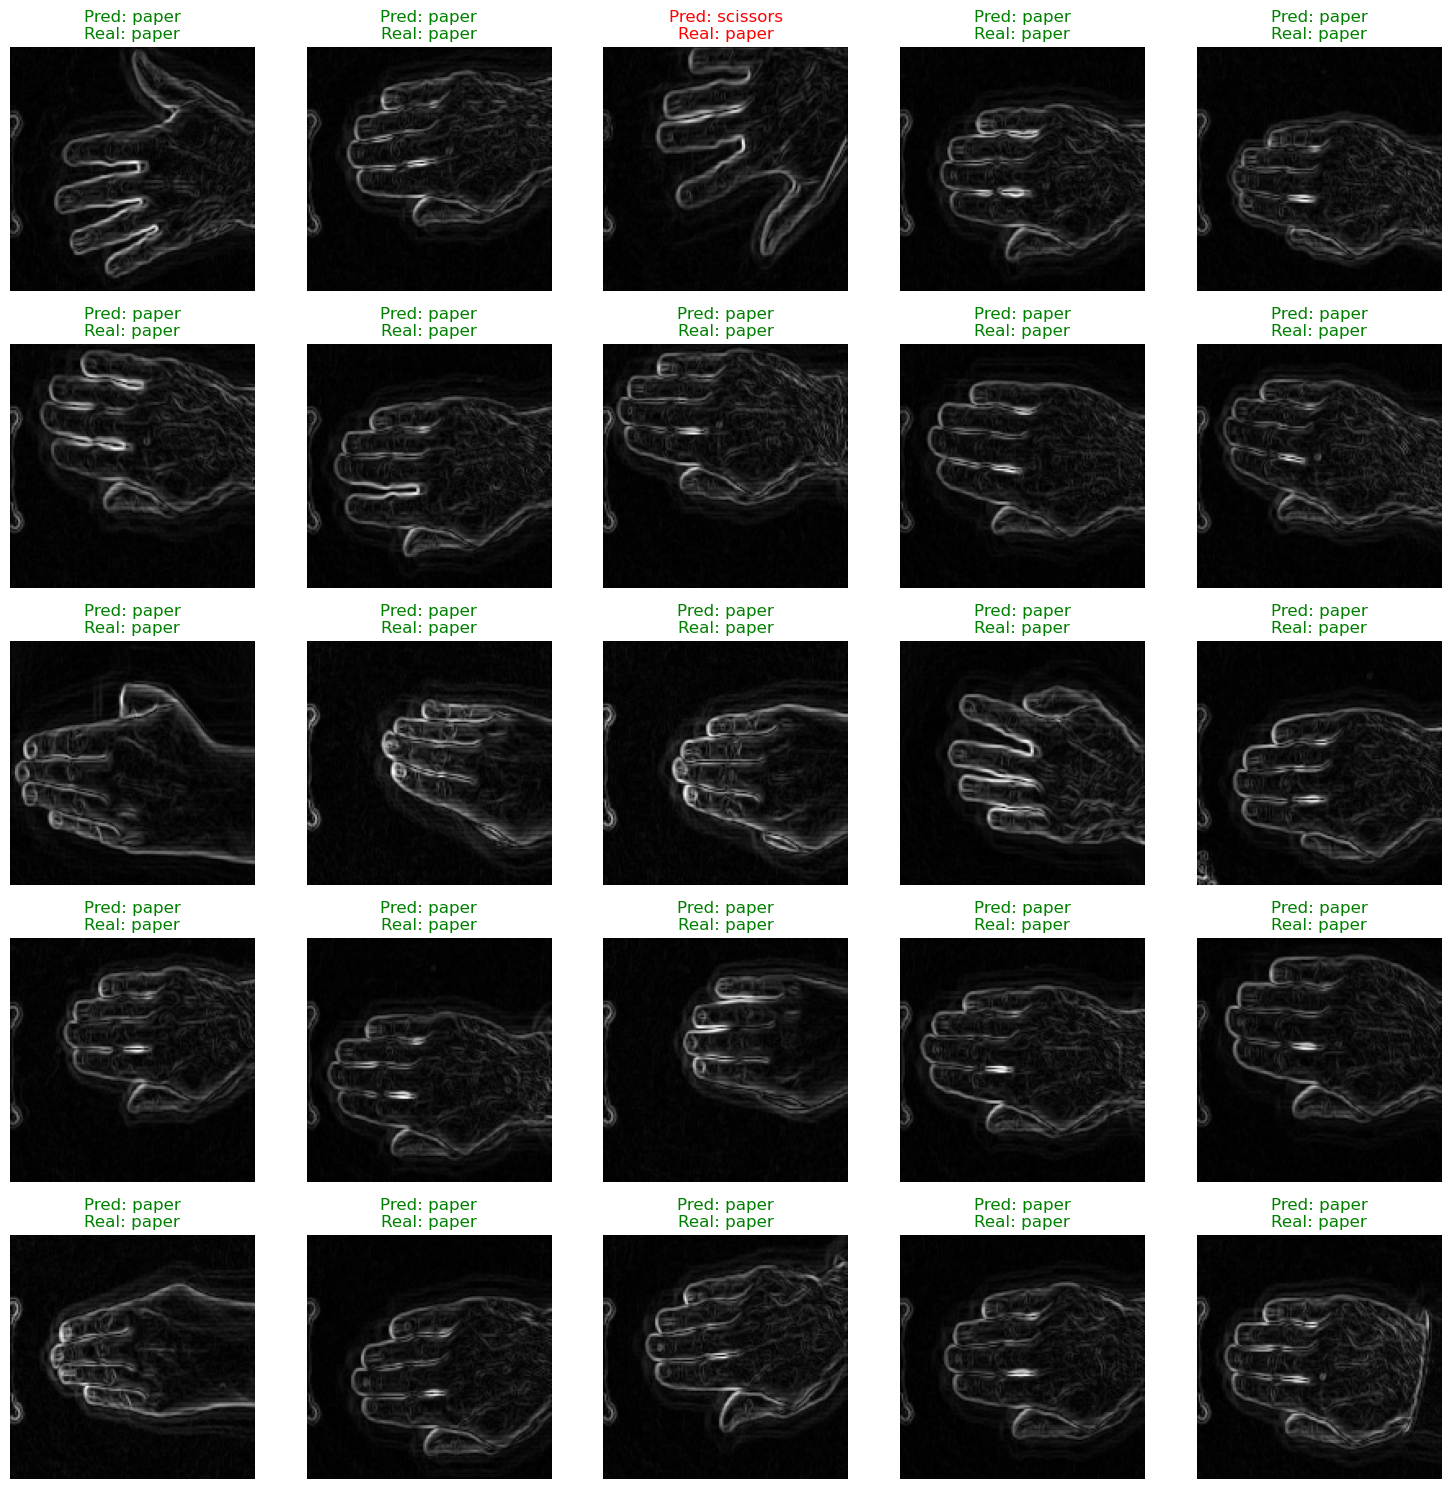

In [117]:
test_images, test_labels = next(test_generator)

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

class_names = list(test_generator.class_indices.keys())

plt.figure(figsize=(15, 15))
for i in range(min(25, len(test_images))):
    # Convertir imagen a uint8
    img = (test_images[i] * 255).astype(np.uint8)

    # Aplicar Sobel (en escala de grises)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel = cv2.magnitude(sobelx, sobely)

    plt.subplot(5, 5, i + 1)
    plt.imshow(sobel, cmap='gray')
    color = 'green' if predicted_labels[i] == true_labels[i] else 'red'
    plt.title(f"Pred: {class_names[predicted_labels[i]]}\nReal: {class_names[true_labels[i]]}",
              color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()


A pesar de que no es necesario aplicar filtros externos, con el fin de explorar visualmente cómo las formas podrían influir en la predicción del modelo